**Title**: Relationship Between Player Expereince, Gender and Age and Average Playtime on a Minecraft Server.

**Introduction**:
Minecraft is a survival game set in a practically infinitely big world made up of voxels, it is one of the most popular video games of all time. At UBC, some researchers are trying to understand how individuals interact with video games using Minecraft. The researchers have set up an online server for people to play Minecraft on and are collecting data about every player. The researchers want to use this data to predict how their servers are being used, and in particular with this project, we will help the researchers by finding out which demographic of player is most likely to contribute the most data for the experiment. In particular, the question we will be answering is what is the experience level, gender and age of the players that will have the highest average play time. A KNN regression algorithm will be run to predict the type of person which will have the most amount of playtime based off these variables.

The dataset that we will be using for our answering our question and project will be ***players.csv***. The ***players.csv*** file has 196 observations and 9 variables which describe;
- The variable titled *experience* relates to the skill level or the experience of the player, it is of variable type **Character** and has 5 possible values;
    - Beginner
    - Amateur
    - Regular
    - Pro
    - Veteran
  
- The variable titled *played_hours* relates to how many hours a specific player has played, it is of variable type **Double**.

- The variable titled *hashedEmail* relates to each individual player’s encrypted email, it is of variable type **Character**.

- The variable titled *subscribe* relates to if the player has subscribed to receive emails from PlaiCraft or not, it is of variable type **Logical** and has 2 possible values;
    - TRUE
    - FALSE

- The variable titled *gender* relates to the player's gender, it is of variable type **Character** and has 7 possible values;
    - Male
    - Female
    - Agender
    - Non-binary
    - Other
    - Prefer not to say
    - Two-Spirited

- The variable titled *age* relates to the player's age, it is of variable type **Double**.

- The variable *name* relates to the player's in-game psuedo-name, it is of variable type  **Character**.

- The variable *individualID* refers to every player’s individual ID, it is of variable type  **Logical**.

- The variable *organizationName* refers to every player’s organization, it is of variable type **Logical**.

For our question, we will be focusing on the *experience*, *gender*, and *age* variables as our predictors and with *played_hours* as our response variable.

In [2]:
library(tidyverse)
library(rsample)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

In [3]:
player_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
playerfile <- "players.csv"
download.file(url = player_url, destfile = playerfile, mode = "wb")

session_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessionfile <- "sessions.csv"
download.file(url = session_url, destfile = sessionfile, mode = "wb")

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [4]:
players_select <- select(players, experience, played_hours, gender, age)
players_select

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
⋮,⋮,⋮,⋮
Amateur,0.0,Prefer not to say,17
Amateur,2.3,Male,17
Pro,0.2,Other,91


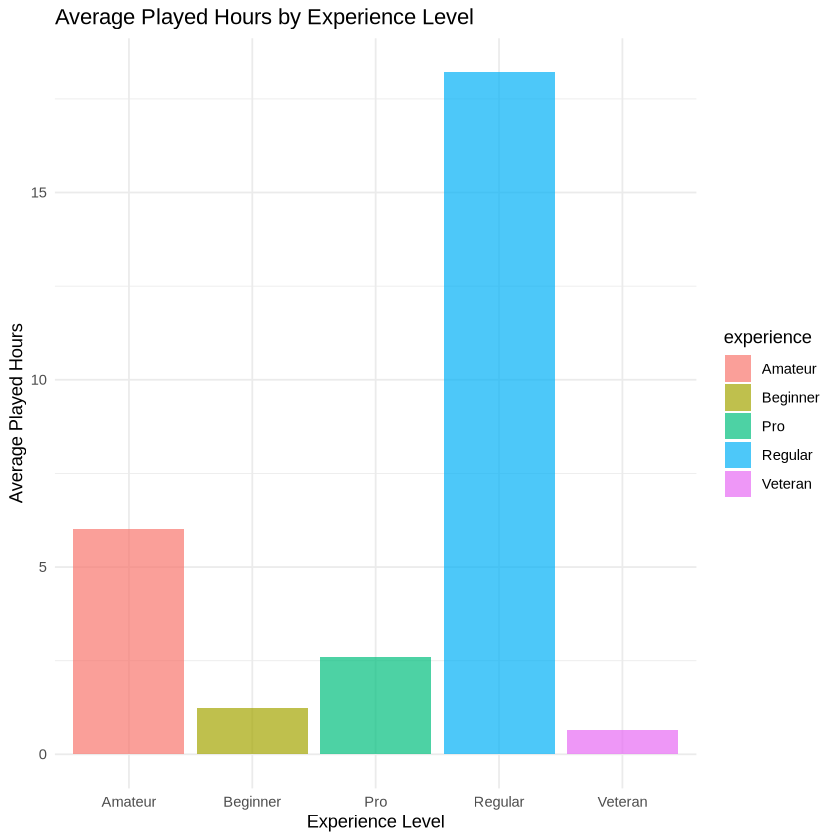

In [5]:
avg_played_experience <- players |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))

ggplot(avg_played_experience, aes(x = experience, y = mean_played_hours, fill = experience)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Average Played Hours by Experience Level",
    x = "Experience Level",
    y = "Average Played Hours") +
    theme_minimal()

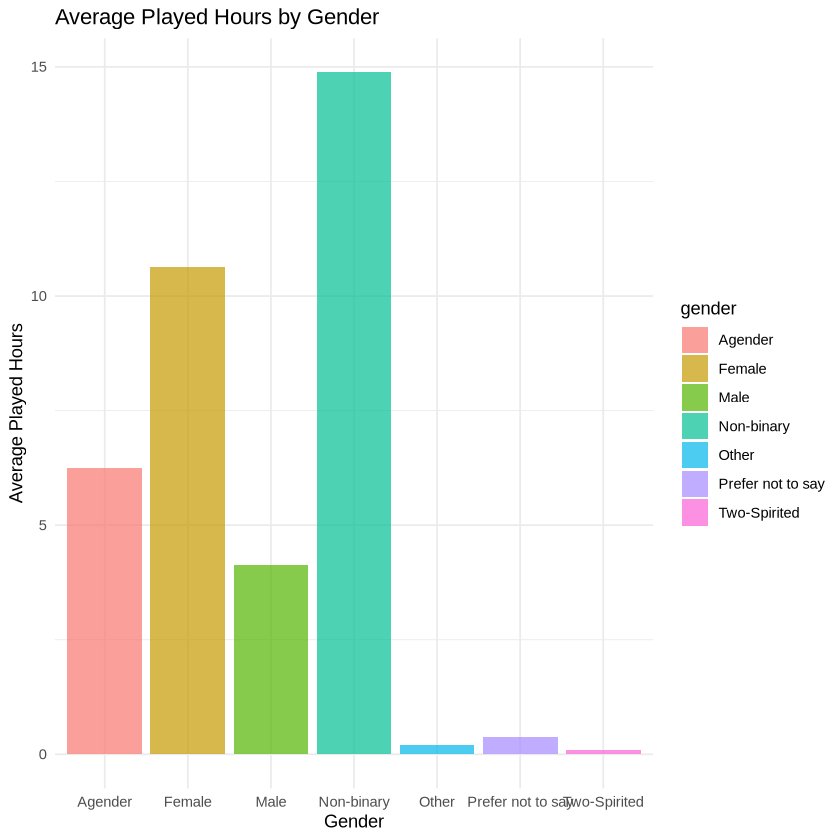

In [6]:
avg_played_gender <- players |>
    group_by(gender) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))

ggplot(avg_played_gender, aes(x = gender, y = mean_played_hours, fill = gender)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Average Played Hours by Gender",
    x = "Gender",
    y = "Average Played Hours") +
    theme_minimal()

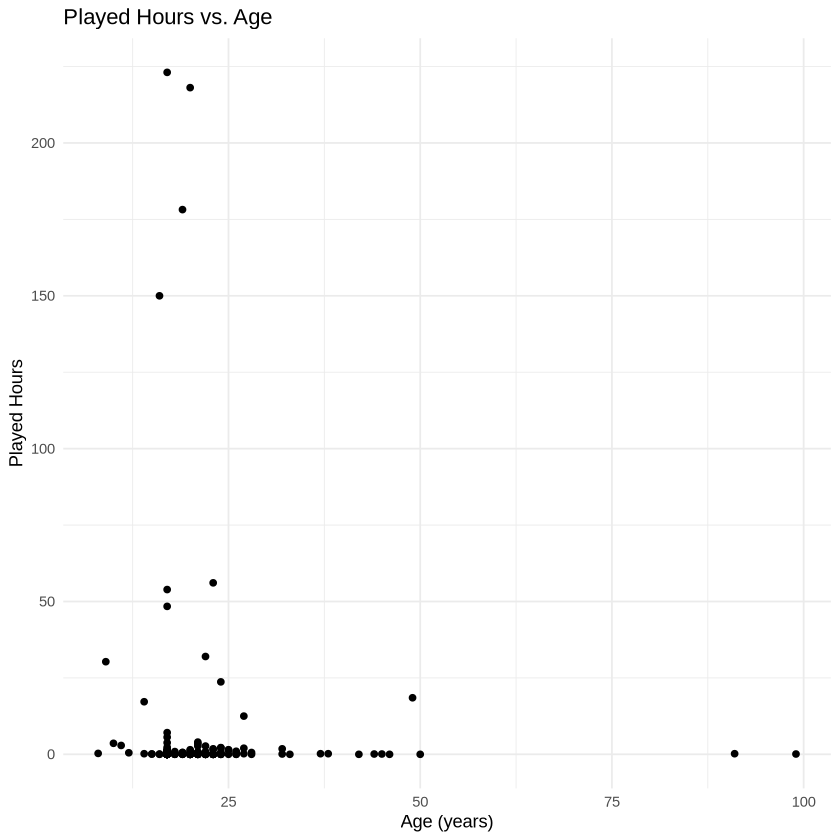

In [7]:
ggplot(players, aes(x = age, y = played_hours)) +
    geom_point() +
    labs(title = "Played Hours vs. Age",
    x = "Age (years)",
    y = "Played Hours") +
    theme_minimal()

In [8]:
players_select_ex_hours <- select(players_select, experience, played_hours)

#mutate to code experience into dummy numerical variable
players_select_ex_hours <- players_select_ex_hours |>
  mutate(experience_numeric = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Pro" ~ 4,
    experience == "Veteran" ~ 5
  ))

players_select_ex_hours <- select(players_select_ex_hours,played_hours,experience_numeric)
players_select_ex_hours

played_hours,experience_numeric
<dbl>,<dbl>
30.3,4
3.8,5
0.0,5
⋮,⋮
0.0,2
2.3,2
0.2,4


In [9]:
players_select_gender_hours <- select(players_select, gender, played_hours)

#mutate to code experience into dummy numerical variable
players_select_gender_hours <- players_select_gender_hours |>
  mutate(gender_numeric = case_when(
    gender == "Agender" ~ 1,
    gender == "Female" ~ 2,
    gender == "Male" ~ 3,
    gender == "Non_binary" ~ 4,
    gender == "Other" ~ 5,
    gender == "Prefer not to say" ~ 6,
    gender == "Two-Spirited" ~ 7,
  ))

players_select_gender_hours <- select(players_select_gender_hours,played_hours,gender_numeric)
players_select_gender_hours

played_hours,gender_numeric
<dbl>,<dbl>
30.3,3
3.8,3
0.0,3
⋮,⋮
0.0,6
2.3,3
0.2,5


In [10]:
players_select_age_hours <- select(players_select, age, played_hours)

# because age is already numerical no need to convert to numerical variable
players_select_age_hours

age,played_hours
<dbl>,<dbl>
9,30.3
17,3.8
17,0.0
⋮,⋮
17,0.0
17,2.3
91,0.2


In [11]:
set.seed(123)

# Split train and test for experience and player hours
ex_split <- initial_split(players_select_ex_hours, prop = 0.70, strata = played_hours)
ex_training <- training(ex_split)
ex_testing <- testing(ex_split)

In [12]:
# Split train and test for gender and player hours
gender_split <- initial_split(players_select_gender_hours, prop = 0.70, strata = played_hours)
gender_training <- training(gender_split)
gender_testing <- testing(gender_split)

In [13]:
# Split train and test for age and player hours
age_split <- initial_split(players_select_age_hours, prop = 0.70, strata = played_hours)
age_training <- training(age_split)
age_testing <- testing(age_split)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,28.50698464,5,8.272876085,Preprocessor1_Model1
1,rsq,standard,0.00754383,5,0.002642548,Preprocessor1_Model1
11,rmse,standard,22.25449179,5,8.987511133,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
71,rsq,standard,0.04865642,5,0.006344753,Preprocessor1_Model8
81,rmse,standard,20.24491803,5,9.243533425,Preprocessor1_Model9
81,rsq,standard,0.03743130,5,0.014091844,Preprocessor1_Model9


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
81,rmse,standard,20.24492,5,9.243533,Preprocessor1_Model9


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,30.18986740
rsq,standard,0.01691562
mae,standard,11.79911523


.pred,age,played_hours
<dbl>,<dbl>,<dbl>
5.202469,21,0.1
5.202469,21,0.0
7.933333,17,0.0
⋮,⋮,⋮
5.276543,32,1.8
7.933333,17,1.7
7.933333,17,2.3


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


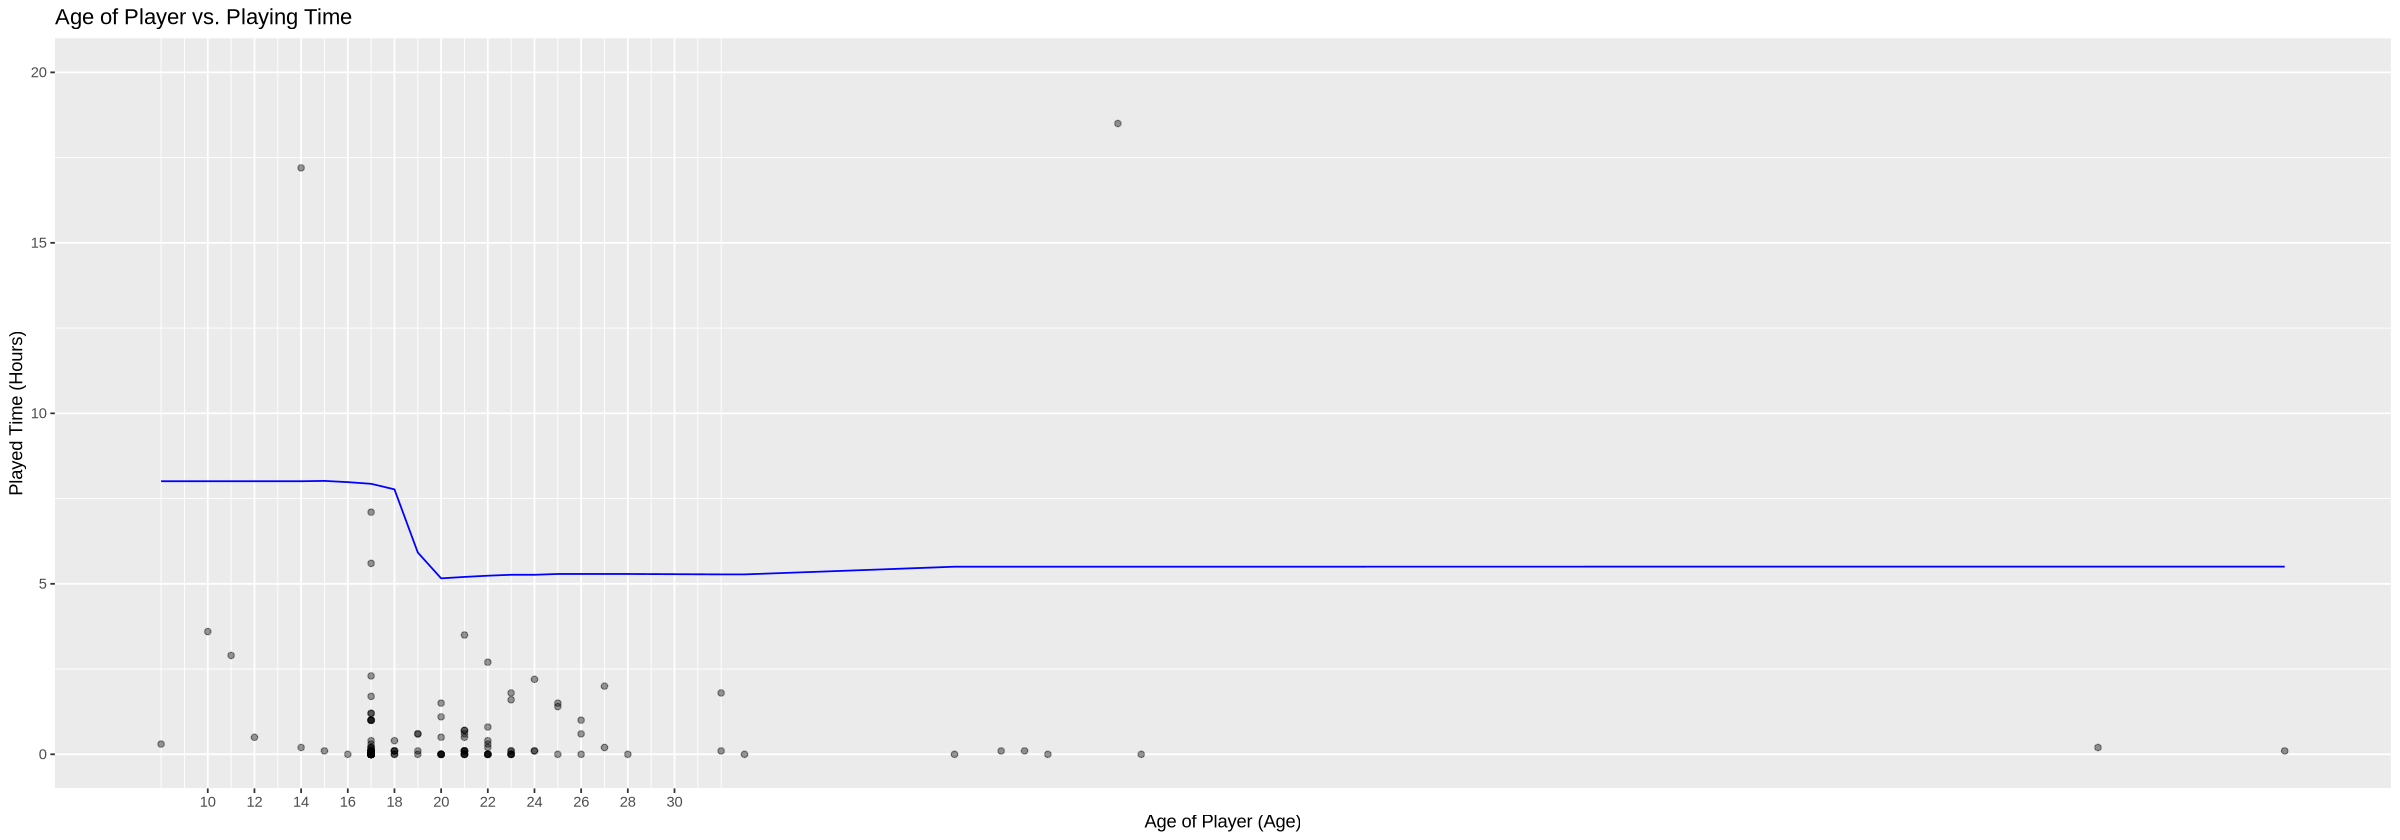

In [25]:
age_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("regression")
age_recipe <- recipe(played_hours ~., data = age_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
age_recipe

age_vfold <- vfold_cv(age_training, v = 5, strata = played_hours)
age_workflow <- workflow() |>
                     add_model(age_spec) |>
                     add_recipe(age_recipe)
age_workflow

gridvals <- tibble(neighbors = seq(1, 81, by = 10))
age_results <- age_workflow |>
    tune_grid(resamples = age_vfold, grid = gridvals) |>
    collect_metrics()
age_results

age_min <- age_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
age_min

age_k_min <- age_min |>
         pull(neighbors)

age_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = age_k_min) |>
                      set_engine("kknn") |>
                      set_mode("regression")

age_best_fit <- workflow() |>
                    add_recipe(age_recipe) |>
                    add_model(age_best_spec) |>
                    fit(data = age_training)

age_summary <- age_best_fit |>
                   predict(age_testing) |>
                   bind_cols(age_testing) |>
                   metrics(truth = played_hours, estimate = .pred)

age_summary

age_preds <- age_best_fit |>
                  predict(age_training) |>
                  bind_cols(age_training)
age_preds

options(repr.plot.width = 20, repr.plot.height = 7)

age_plot <- age_preds |>
ggplot(aes(x=age, y=played_hours)) +
geom_point(alpha = 0.4) +
geom_line(data = age_preds,
        mapping = aes(x = age, y = .pred),
        color = "blue") +
labs(x="Age of Player (Age)", y="Played Time (Hours)") +
ggtitle(paste0("Age of Player vs. Playing Time")) +
scale_y_continuous(limits = c(0, 20)) +
scale_x_continuous(breaks = seq(from = 10, to = 30, by = 2))
age_plot

In [15]:
ex_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
                 set_engine("kknn") |>
                 set_mode("regression")
ex_recipe <- recipe(played_hours ~ experience_numeric, data = ex_training) |>
                   step_scale(all_predictors()) |>
                   step_center(all_predictors())
ex_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [16]:
ex_vfold <- vfold_cv(ex_training, v = 5, strata = played_hours)
ex_workflow <- workflow() |>
                     add_model(ex_spec) |>
                     add_recipe(ex_recipe)
ex_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [17]:
gridvals <- tibble(neighbors = seq(1, 81, by = 10))
ex_results <- ex_workflow |>
    tune_grid(resamples = ex_vfold, grid = gridvals) |>
    collect_metrics()
ex_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,24.83052167,5,10.06948041,Preprocessor1_Model1
1,rsq,standard,0.07245782,5,0.03579777,Preprocessor1_Model1
11,rmse,standard,24.83271489,5,10.06886313,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
71,rsq,standard,0.08470620,5,0.038530056,Preprocessor1_Model8
81,rmse,standard,25.93058993,5,9.131257905,Preprocessor1_Model9
81,rsq,standard,0.01785858,5,0.006282905,Preprocessor1_Model9


In [18]:
ex_min <- ex_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
ex_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,24.83052,5,10.06948,Preprocessor1_Model1


In [19]:
ex_k_min <- ex_min |>
         pull(neighbors)

ex_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = ex_k_min) |>
                      set_engine("kknn") |>
                      set_mode("regression")

ex_best_fit <- workflow() |>
                    add_recipe(ex_recipe) |>
                    add_model(ex_best_spec) |>
                    fit(data = ex_training)

ex_summary <- ex_best_fit |>
                   predict(ex_testing) |>
                   bind_cols(ex_testing) |>
                   metrics(truth = played_hours, estimate = .pred)

ex_summary

Warning message:
“A correlation computation is required, but `estimate` is constant and has 0
standard deviation, resulting in a divide by 0 error. `NA` will be returned.”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,20.03722
rsq,standard,NA
mae,standard,3.94500


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


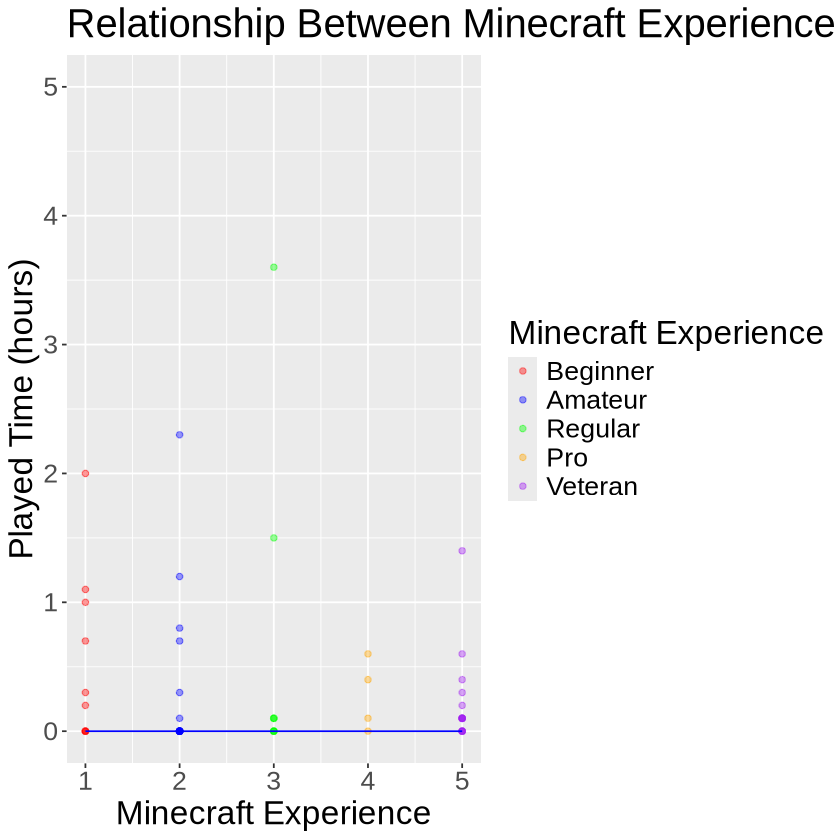

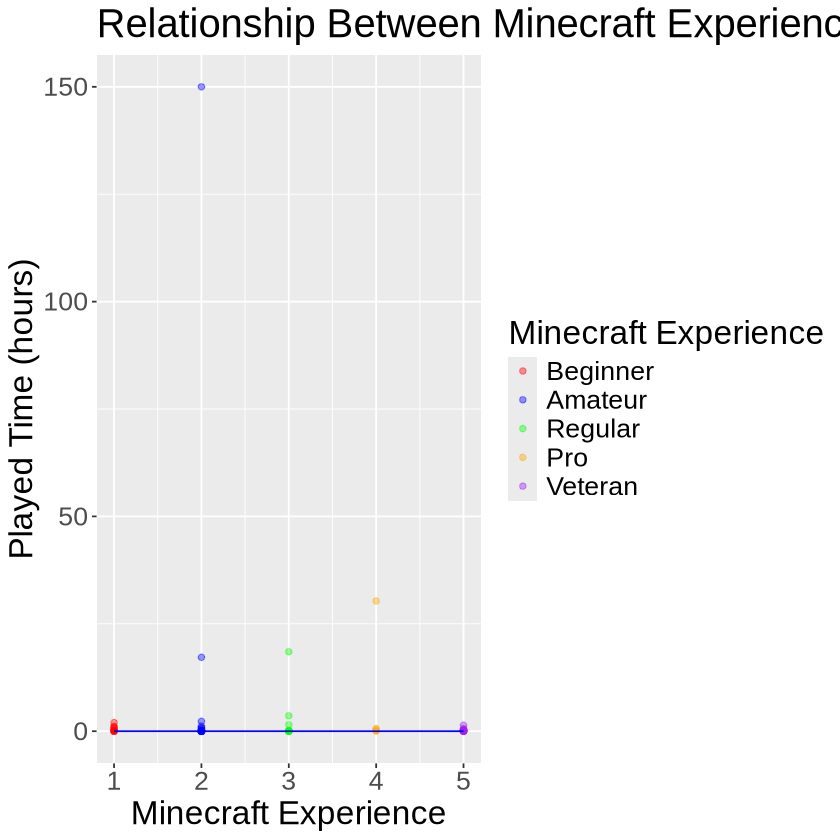

In [20]:
options(repr.plot.width = 7, repr.plot.height = 7)

# your code here
ex_preds <- ex_best_fit |>
                  predict(ex_testing) |>
                  bind_cols(ex_testing)

ex_plot <- ggplot(ex_preds, aes(x = experience_numeric, y = played_hours)) +
        geom_point(aes(color = as.factor(experience_numeric)), alpha = 0.4) + 
        xlab("Minecraft Experience") +
        ylab("Played Time (hours)") + 
        geom_line(data = ex_preds, aes(x = experience_numeric, y = .pred), color = "blue") +
        ggtitle("Relationship Between Minecraft Experience and Played Time") +
        theme(text = element_text(size = 20)) +
        scale_y_continuous(limits = c(0, 5)) +
        scale_color_manual(
            name = "Minecraft Experience",
            values = c("1" = "red",
                       "2" = "blue",
                       "3" = "green",
                       "4" = "orange",
                       "5" = "purple"),
            labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran") 
        )

ex_plot_org <- ggplot(ex_preds, aes(x = experience_numeric, y = played_hours)) +
        geom_point(aes(color = as.factor(experience_numeric)), alpha = 0.4) + 
        xlab("Minecraft Experience") +
        ylab("Played Time (hours)") + 
        geom_line(data = ex_preds, aes(x = experience_numeric, y = .pred), color = "blue") +
        ggtitle("Relationship Between Minecraft Experience and Played Time") +
        theme(text = element_text(size = 20)) +
        scale_color_manual(
            name = "Minecraft Experience", 
            values = c("1" = "red",
                       "2" = "blue",
                       "3" = "green",
                       "4" = "orange",
                       "5" = "purple"),
            labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")
        )

ex_plot
ex_plot_org